In [11]:
import matplotlib.pyplot as plt



import pandas as pd
import numpy as np
import os
import env

import reg_wrangle as rw


from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = rw.wrangle_zillow()

In [3]:
train, validate, test, train_scaled, validate_scaled, test_scaled = rw.wrangle_zillow()

In [4]:
df

(         bed_rooms  bath_rooms  finished_sqft  tax_val_dollar_count  \
 1567873          3         1.0           1248                191578   
 1218138          2         2.0           1326               1345206   
 339661           2         1.0           1053                356648   
 1017133          3         2.0           1256                175069   
 40250            3         2.0           1640                543000   
 ...            ...         ...            ...                   ...   
 941799           2         1.0            696                 27699   
 631585           3         3.0           2081                619590   
 883917           3         2.0           1742                196237   
 1253096          4         3.0           2066                617344   
 372341           3         2.0           1260                351730   
 
          year_built   tax_amt  fips  
 1567873        1950   2712.21  6037  
 1218138        1950  16539.04  6037  
 339661         1

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198531 entries, 1567873 to 372341
Data columns (total 7 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   bed_rooms             1198531 non-null  int64  
 1   bath_rooms            1198531 non-null  float64
 2   finished_sqft         1198531 non-null  int64  
 3   tax_val_dollar_count  1198531 non-null  int64  
 4   year_built            1198531 non-null  int64  
 5   tax_amt               1198531 non-null  float64
 6   fips                  1198531 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 73.2 MB


In [6]:
train.shape

(1198531, 7)

In [7]:
train_scaled = train.copy()

In [8]:
# make, fit, use:
columns_to_scale = ['bed_rooms', 'bath_rooms','tax_amt', 'finished_sqft']
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [9]:
train_scaled.head(2)

,bed_rooms,bath_rooms,finished_sqft,tax_val_dollar_count,year_built,tax_amt,fips
1567873,0.200000,0.03125,0.001309,191578,1950,0.002510,6037
1218138,0.133333,0.06250,0.001391,1345206,1950,0.015335,6037


Text(0, 0.5, 'Count')

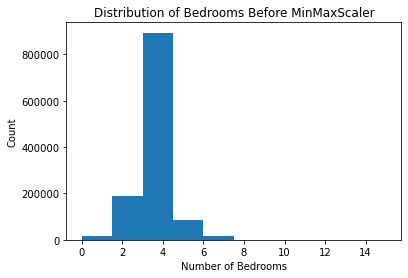

In [12]:
plt.hist(train.bed_rooms)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

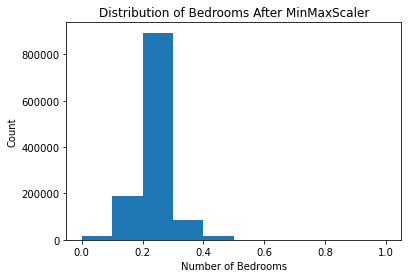

In [13]:
plt.hist(train_scaled.bed_rooms)
plt.title('Distribution of Bedrooms After MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

In [14]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
#    return fig, axs

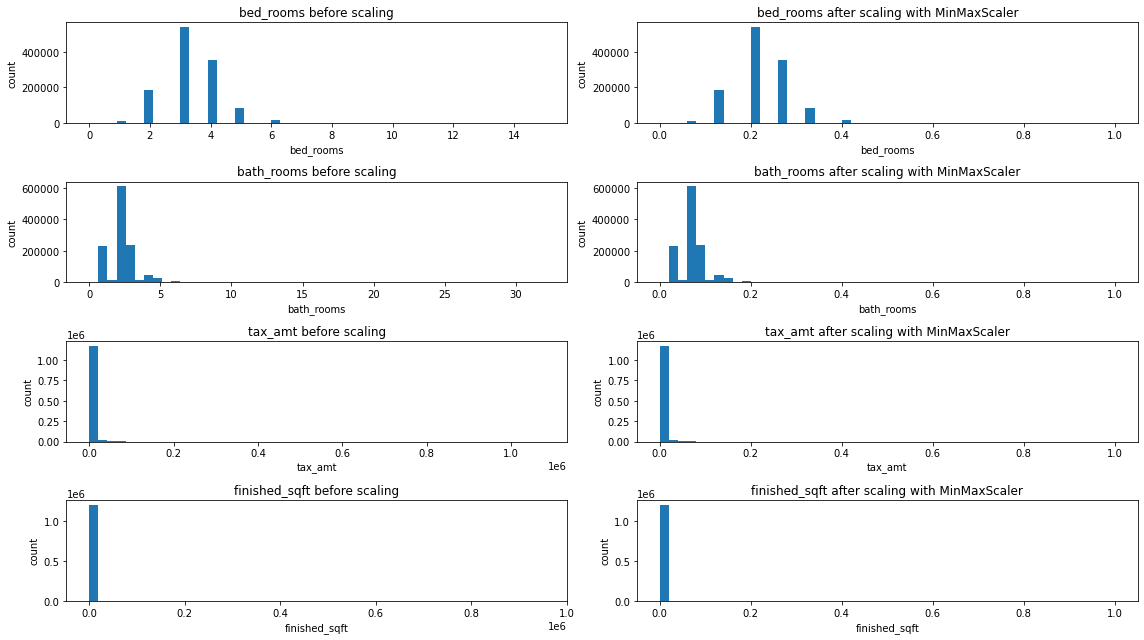

In [15]:
# MinMaxScaler Applied
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

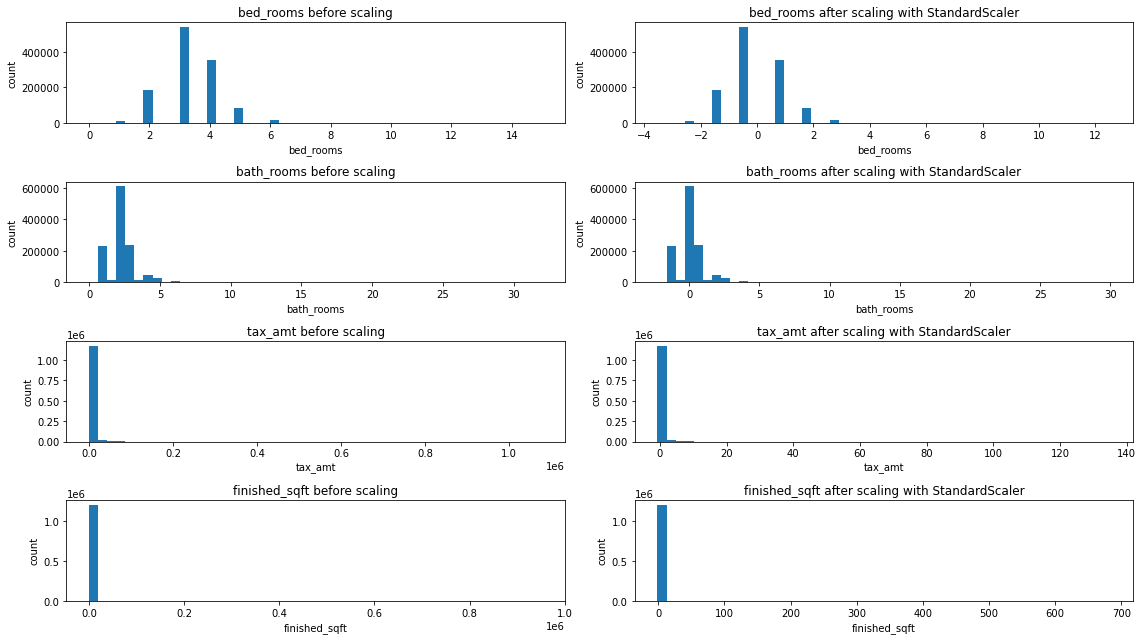

In [16]:
# StandardScaler Applied
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

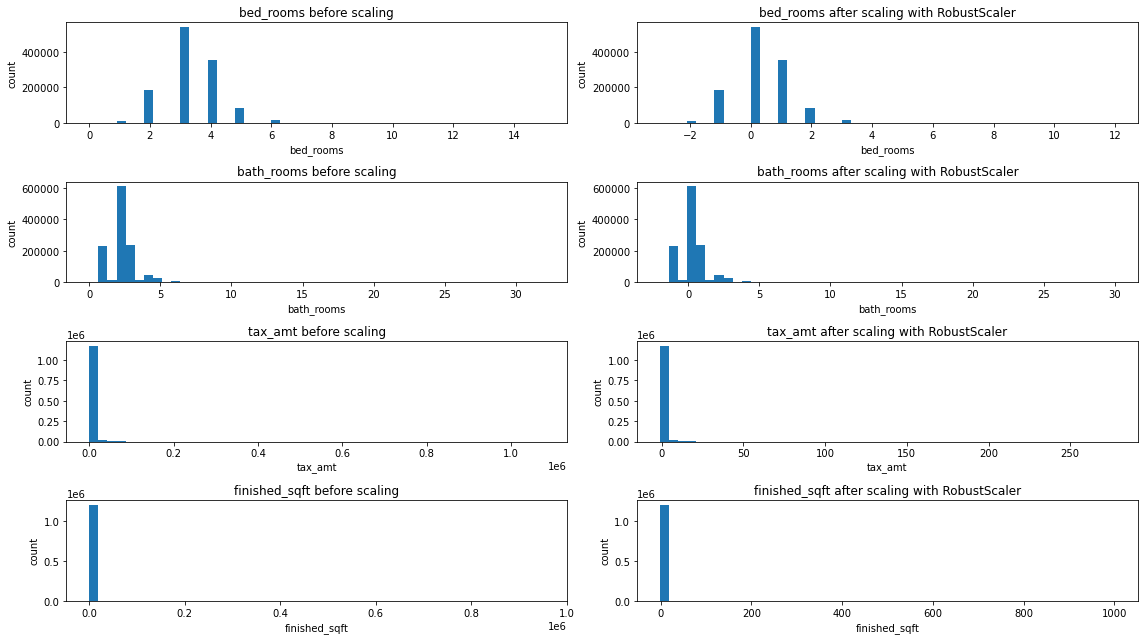

In [17]:
# RobustScaler Applied
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

In [18]:
scaler = MinMaxScaler()
original_data = train[['tax_amt']]
scaled_data = scaler.fit_transform(original_data)

In [19]:
scaler.inverse_transform(scaled_data)[:5]

array([[ 2712.21],
       [16539.04],
       [ 4575.16],
       [ 2635.51],
       [ 6344.96]])

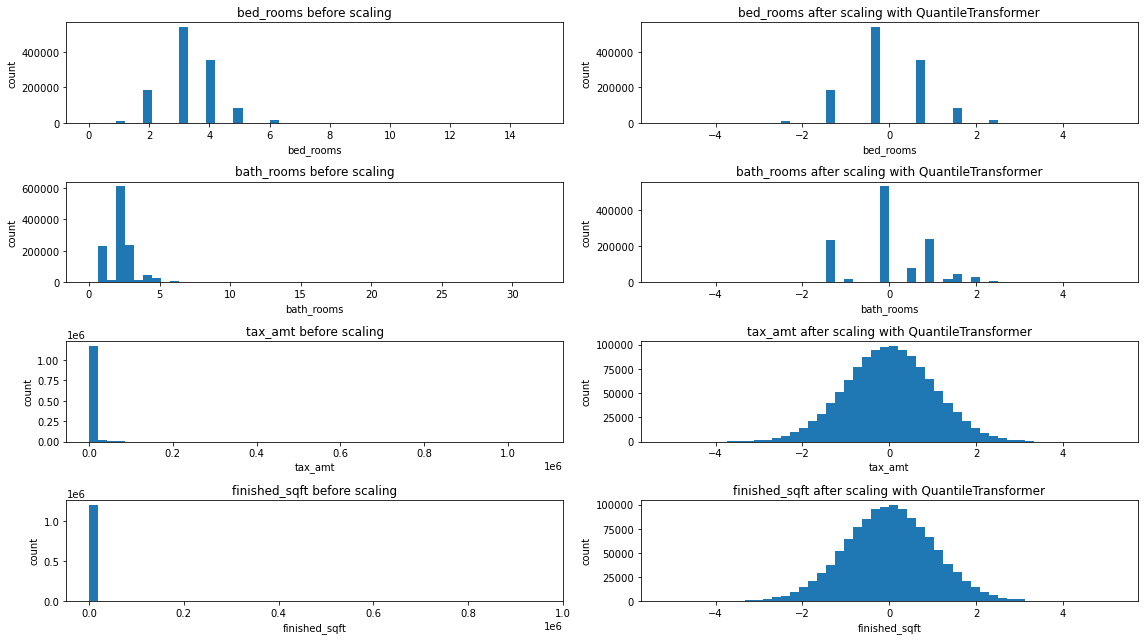

In [20]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                 df=train,
                 columns_to_scale=columns_to_scale, 
                 bins=50)

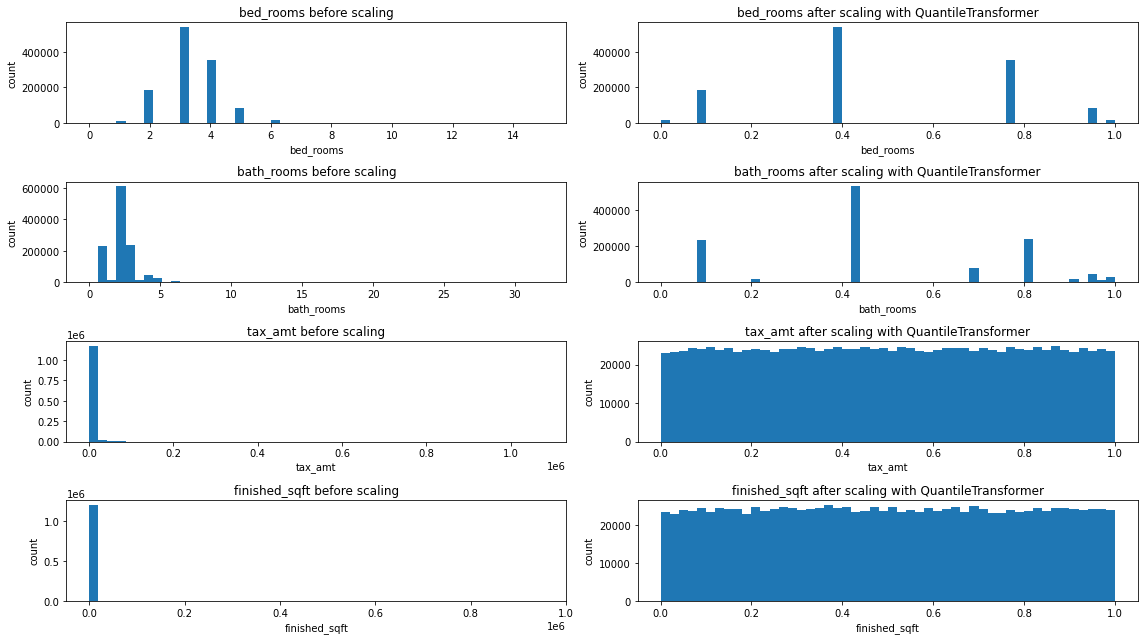

In [21]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

In [22]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bed_rooms', 'bath_rooms', 'tax_amt', 'finished_sqft'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled